In [1]:
import json
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load Dataset

In [2]:
# image_val_path = 'bdd100k/images/100k/train/'
# label_path = 'bdd100k/labels/bdd100k_labels_images_train.json'
# save_label_path = 'bdd100k/labels/bdd100k_labels_images_train_highway_lane.json'

In [3]:
image_val_path = 'bdd100k/images/100k/val/'
label_path = 'bdd100k/labels/bdd100k_labels_images_val.json'
save_label_path = 'bdd100k/labels/bdd100k_labels_images_val_highway_lane.json'

In [4]:
json_file = open(label_path, 'r')
labels_json = json.load(json_file)

# Keys

In [5]:
labels_json[0].keys()

dict_keys(['timestamp', 'attributes', 'labels', 'name'])

In [6]:
labels_json[0]['labels'][0].keys()

dict_keys(['id', 'manualShape', 'manualAttributes', 'category', 'attributes', 'box2d'])

In [7]:
labels_json[0]['attributes'].keys()

dict_keys(['weather', 'timeofday', 'scene'])

In [8]:
labels_json[0]['attributes']

{'scene': 'city street', 'timeofday': 'daytime', 'weather': 'overcast'}

# Pandas Dataframe

In [9]:
df = pd.DataFrame(labels_json)

In [10]:
print(len(df))
df.head()

10000


,attributes,labels,name,timestamp
0,"{'weather': 'overcast', 'timeofday': 'daytime'...","[{'id': 0, 'manualShape': True, 'manualAttribu...",b1c66a42-6f7d68ca.jpg,10000
1,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'id': 51, 'manualShape': True, 'manualAttrib...",b1c81faa-3df17267.jpg,10000
2,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'id': 68, 'manualShape': True, 'manualAttrib...",b1c81faa-c80764c5.jpg,10000
3,"{'weather': 'undefined', 'timeofday': 'daytime...","[{'id': 92, 'manualShape': True, 'manualAttrib...",b1c9c847-3bda4659.jpg,10000
4,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'id': 116, 'manualShape': True, 'manualAttri...",b1ca2e5d-84cf9134.jpg,10000


# Search highway seans

In [11]:
df_highway = df[df.apply(lambda x: x['attributes']['scene'], axis=1) == 'highway']

In [12]:
df_highway = df_highway.reset_index(drop=True)
df_highway.head()

,attributes,labels,name,timestamp
0,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'id': 51, 'manualShape': True, 'manualAttrib...",b1c81faa-3df17267.jpg,10000
1,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'id': 68, 'manualShape': True, 'manualAttrib...",b1c81faa-c80764c5.jpg,10000
2,"{'weather': 'clear', 'timeofday': 'daytime', '...","[{'id': 329, 'manualShape': True, 'manualAttri...",b1cebfb7-284f5117.jpg,10000
3,"{'weather': 'rainy', 'timeofday': 'daytime', '...","[{'id': 350, 'manualShape': True, 'manualAttri...",b1d0091f-75824d0d.jpg,10000
4,"{'weather': 'overcast', 'timeofday': 'daytime'...","[{'id': 383, 'manualShape': True, 'manualAttri...",b1d0091f-f2c2d2ae.jpg,10000


In [13]:
df_highway['attributes'][0]

{'scene': 'highway', 'timeofday': 'night', 'weather': 'clear'}

# Search parallel four lanes seans

In [14]:
df_highway_lane = pd.DataFrame()

for i in range(len(df_highway)):
    tmp_se = df_highway.iloc[i]
    tmp_label = df_highway.iloc[i]['labels']
    
    lane_count = 0
    except_flag = False
    for j in range(len(tmp_label)):
        if tmp_label[j]['category'] == 'lane':
            if tmp_label[j]['attributes']['laneDirection'] == 'parallel' and \
               (tmp_label[j]['attributes']['laneType'] == 'single other' or \
                tmp_label[j]['attributes']['laneType'] == 'single white' or \
                tmp_label[j]['attributes']['laneType'] == 'single yellow'):
                lane_count += 1
            elif tmp_label[j]['attributes']['laneDirection'] == 'vertical' or \
                 tmp_label[j]['attributes']['laneType'] == 'crosswalk':
                except_flag = True
        elif tmp_label[j]['category'] == 'bike' or \
             tmp_label[j]['category'] == 'motor' or \
             tmp_label[j]['category'] == 'person' or \
             tmp_label[j]['category'] == 'rider' or \
             tmp_label[j]['category'] == 'traffic light':
                except_flag = True

    if lane_count >= 4 and except_flag == False:
        df_highway_lane = df_highway_lane.append(tmp_se)

In [15]:
df_highway_lane = df_highway_lane.reset_index(drop=True)

In [16]:
print(len(df_highway_lane))
df_highway_lane.head()

1220


,attributes,labels,name,timestamp
0,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'id': 68, 'manualShape': True, 'manualAttrib...",b1c81faa-c80764c5.jpg,10000.0
1,"{'weather': 'clear', 'timeofday': 'daytime', '...","[{'id': 329, 'manualShape': True, 'manualAttri...",b1cebfb7-284f5117.jpg,10000.0
2,"{'weather': 'rainy', 'timeofday': 'daytime', '...","[{'id': 350, 'manualShape': True, 'manualAttri...",b1d0091f-75824d0d.jpg,10000.0
3,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'id': 831, 'manualShape': True, 'manualAttri...",b1d22449-117aa773.jpg,10000.0
4,"{'weather': 'clear', 'timeofday': 'daytime', '...","[{'id': 1445, 'manualShape': True, 'manualAttr...",b1df722f-57d21f3f.jpg,10000.0


# Show

In [17]:
data_example_name = df_highway_lane.iloc[0]['name']

In [18]:
img_path = image_val_path + data_example_name
img = mpimg.imread(img_path)
img_path

'bdd100k/images/100k/val/b1c81faa-c80764c5.jpg'

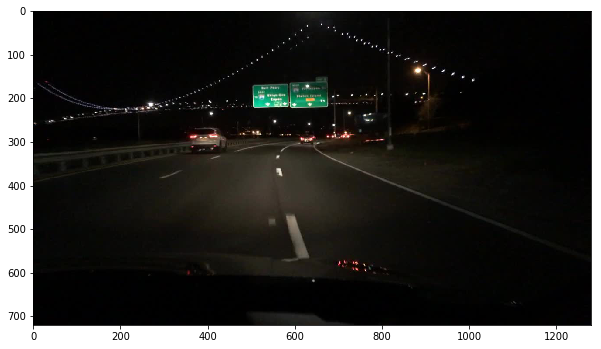

In [19]:
fig = plt.figure(figsize=(10,10))
plt.plot()
plt.imshow(img)

# pandas dataframe -> dict

In [20]:
dict_highway_lane = df_highway_lane.to_dict(orient='index')

# dict -> list

In [21]:
list_highway_lane = list(dict_highway_lane.items())

# delete list index

In [22]:
list_highway_lane[0][0]

0

In [23]:
l = list_highway_lane
list_highway_lane_delete_index = list([v[1] for v in l])

# Save into a json file with indent

In [24]:
with open(save_label_path, 'w') as f:
    json.dump(list_highway_lane_delete_index, f, indent=4)

# Result 

In [25]:
print(len(df), '->', len(df_highway), '->', len(df_highway_lane))

10000 -> 2499 -> 1220
